In [2]:
import os,sys
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from STutils.pl import getDefaultColors

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=50,dpi_save=300,facecolor='white',fontsize=13,vector_friendly=True,figsize=(3,3))
sc.settings.verbosity = 3

In [3]:
import yaml
with open('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/sample.yaml', 'r') as file:
    sample_dict = yaml.safe_load(file)

In [4]:
od = f'/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/9.1_TCell_region_celltype/'
os.system(f'mkdir -p {od}')
os.chdir(od)

In [12]:
adata = sc.read('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/1.1_cellbin_rawdata/filtered_data/merged_adata2.h5ad')

In [26]:
adata = sc.read('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/2.1_merge_big_cell_community/all_merged_adata.h5ad')

In [13]:
region_map = {
    "Tumor_Cell_region_1": 'TCR1',
    'Tumor_Cell_region_2': 'TCR2',
    'Tumor_Cell_region_3': 'TCR3',
    'Tumor_Cell_region_4': 'TCR4',
    'Tumor_around_region_1': 'TAR1',
    'Tumor_around_region_2': 'TAR2',
    'Tumor_around_region_3': 'TAR3',
    'Tumor_around_region_4': 'TAR4',
    'Tumor_around_region_5': 'TAR5',
    'Mesenchymal_Cell_region_1': 'MCR1',
    'Mesenchymal_Cell_region_2': 'MCR2',
    'Mesenchymal_Cell_region_3': 'MCR3',
    'ADM_region_1': 'ADR1',
    'ADM_region_2': 'ADR2',
    'ADM_region_3': 'ADR3',
    'ADM_region_4': 'ADR4',
    'Acinar_Cell_region':'ACR',
    'Immune_Cell_region':'ICR',
}
adata.obs['region'] = adata.obs['community_type'].map(region_map)
adata.obs['region'] = pd.Categorical(adata.obs['region'], categories=sorted(adata.obs['region'].unique()))

meta NOT subset; don't know how to subset; dropped


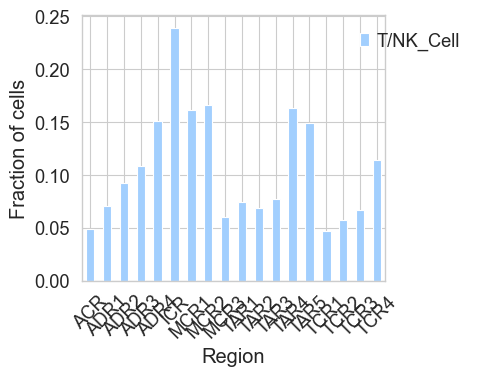

In [23]:
resolution = 'region'
#画community中cellsubtype比例图
filtered_data = adata.obs
# 按照 'community_type' 和 'celltype' 进行分组，并计算细胞数量
grouped = filtered_data.groupby(['region', 'celltype'
                                    ]).size().unstack('celltype').fillna(0)
proportions = grouped.divide(grouped.sum(axis=1), axis=0)
# barplot for T/NK cell percentage in different regions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
fig, ax = plt.subplots(figsize=(5, 4))
num_colors = proportions.index.shape[0]
color_palette = getDefaultColors(num_colors, type=9)
proportions[['T/NK_Cell']].plot.bar(ax=ax, stacked=False, rot=45,color=color_palette)
ax.set_ylabel('Fraction of cells')
ax.set_xlabel('Region')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.savefig('T_NK_cell_fraction.pdf', bbox_inches='tight')

In [19]:
proportions.index.shape

(18,)

In [11]:
proportions

celltype,Acinar_Cell,B_Cell,Duct_Cell,Duct_like_Cell,Endocrine_Cell,Endothelial_Cell,Fibroblast_Cell,Macrophage_Cell,Mast_Cell,Nerve_Cell,PVL_Cell,Plasma_Cell,T/NK_Cell,Tumor_Cell
region,,,,,,,,,,,,,,
ACR,0.718769,0.016971,0.004156,0.048860,0.008678,0.035378,0.055778,0.033768,0.004858,0.000000,0.014155,0.003093,0.049004,0.006534
ADR1,0.575964,0.028892,0.012716,0.132456,0.018840,0.024964,0.034549,0.044628,0.005465,0.000000,0.013320,0.009750,0.070636,0.027820
ADR2,0.300603,0.044847,0.021388,0.217154,0.081813,0.043127,0.056267,0.069741,0.009918,0.000000,0.023776,0.015244,0.092532,0.023592
ADR3,0.128183,0.057853,0.075747,0.186962,0.078694,0.051968,0.082936,0.082986,0.016290,0.000000,0.030350,0.029793,0.108756,0.069483
ADR4,0.092575,0.106454,0.022164,0.087870,0.027488,0.061376,0.122958,0.109781,0.020074,0.000000,0.038293,0.060636,0.151092,0.099238
ICR,0.038620,0.160875,0.007839,0.030403,0.011057,0.064079,0.154917,0.107914,0.019218,0.002397,0.039363,0.040467,0.238886,0.083963
MCR1,0.023769,0.056954,0.005632,0.021668,0.006716,0.084418,0.293734,0.095185,0.013951,0.023947,0.072552,0.013476,0.161690,0.126308
MCR2,0.024057,0.065259,0.004842,0.022062,0.006897,0.077429,0.305518,0.094809,0.014505,0.011143,0.071712,0.014965,0.166065,0.120737
MCR3,0.007705,0.017420,0.001790,0.010459,0.002347,0.043742,0.595949,0.048065,0.005590,0.000569,0.086890,0.003138,0.060534,0.115803


In [14]:
adata.obs['celltype'].value_counts()
adata = adata[adata.obs['celltype'] == 'T/NK_Cell']

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [15]:
rename_dict = {
    'T_CD8_GZMK_NMF_7': 'T_CD8_Cytotoxic',
    'T_CD4NV_CM_rest_NMF_8': 'T_CD4_NV_rest',
    'T_CD4_unknown_NMF_12': 'T_CD4_CD8_rest1',
    'T_CD8_KLRC1_NMF12': 'T_CD8_KLRC1',
    'T_CD4_IL2RA_NMF_10': 'T_Exhaust',
    'T_CD4_unknown_NMF_9': 'T_CD4_CD8_rest2',
    'T_CD8_CXCL13_NMF_17': 'T_CD8_Cytokine',
    'NK_NMF_5': 'NK_NV',
    'T_HSPA1A_NMF_19': 'T_HSPA1A',
    'T_CD8_PRSS1_NMF_20': 'T_CD8_PRSS1',
    'NK_PRSS1_NMF_15': 'NK_Cytotoxic',
    'T_cycling_NMF_3': 'T_cycling'
}
adata.obs['cellsubtype'] = adata.obs['cellsubtype'].map(rename_dict)
adata.obs.columns = adata.obs.columns.to_series().replace(rename_dict)


/tmp/ipykernel_46983/2391798981.py:15: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cellsubtype'] = adata.obs['cellsubtype'].map(rename_dict)


meta NOT subset; don't know how to subset; dropped


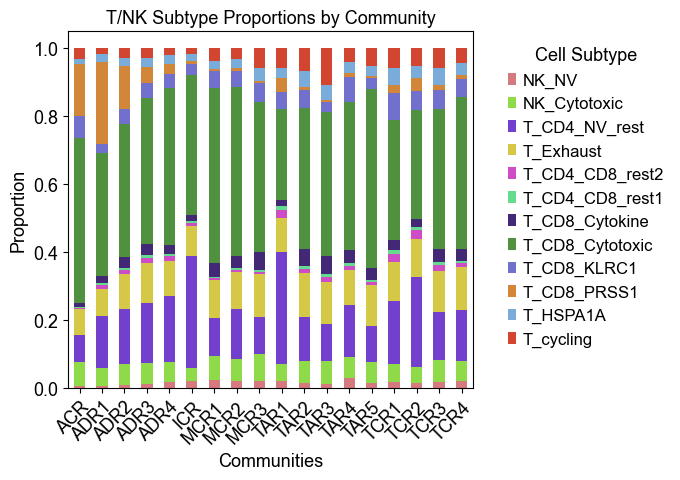

In [12]:
resolution = 'region'
#画community中cellsubtype比例图
filtered_data = adata.obs
# 按照 'community_type' 和 'celltype' 进行分组，并计算细胞数量
grouped = filtered_data.groupby(['region', 'cellsubtype'
                                    ]).size().unstack('cellsubtype').fillna(0)
proportions = grouped.divide(grouped.sum(axis=1), axis=0)
# sort the regions index
proportions = proportions.reindex(sorted(proportions.index))
fig, axs = plt.subplots(figsize=(7, 5))
num_colors = len(proportions.columns)
color_palette = getDefaultColors(num_colors, type=10)
proportions.plot(kind='bar', stacked=True, ax=axs, color=color_palette)
axs.set_title("T/NK Subtype Proportions by Community")
axs.set_xlabel("Communities")
axs.set_ylabel("Proportion")
axs.legend(title="Cell Subtype",
            bbox_to_anchor=(1.05, 1),
            loc='upper left')
axs.grid(False)
plt.setp(axs.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fig.savefig(f"percent_cellsubtype_community_all.pdf",
            bbox_inches="tight")


meta NOT subset; don't know how to subset; dropped


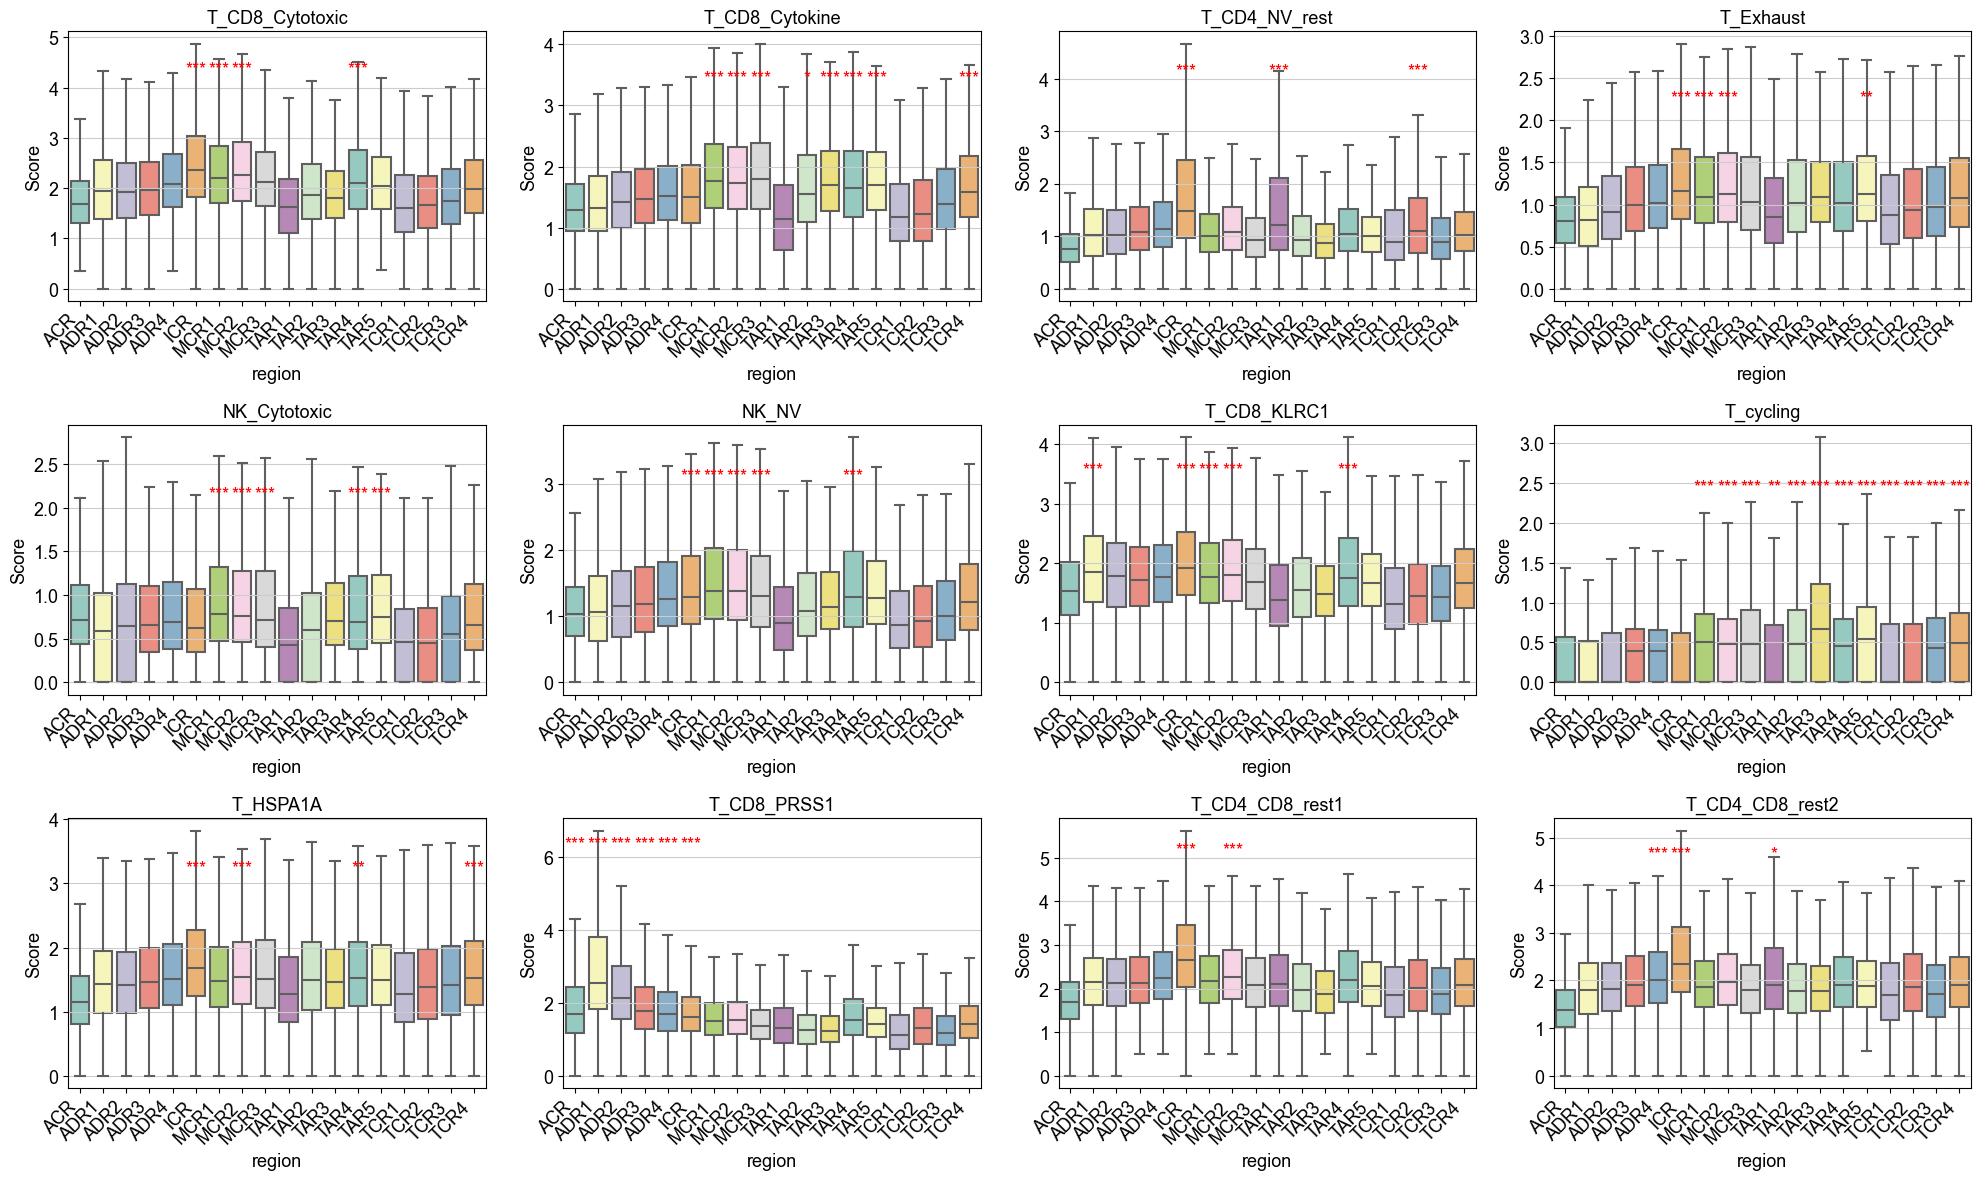

In [17]:
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import seaborn as sns
metadata = adata.obs
# remove the cells which max score - 2nd max score < 0.1
# metadata['max_score'] = metadata[adata.obs['cellsubtype'].unique()].max(axis=1)
# metadata['2nd_max_score'] = metadata[adata.uns['celltypes'].tolist()].apply(lambda x: x.nlargest(2).iloc[-1], axis=1)
# metadata['max_score_diff'] = metadata['max_score'] - metadata['2nd_max_score']
# metadata_filtered = metadata[metadata['max_score'] > metadata['max_score'].describe()['50%']]
grouping_column = "region"
fig, axs = plt.subplots(3, 4, figsize=(20, 12))
for i, column_to_analyze in enumerate(adata.obs['cellsubtype'].unique()):
    # Initialize a DataFrame to store the data
    data_df = pd.DataFrame(metadata[[column_to_analyze, grouping_column]])
    scaler = StandardScaler(with_mean=False)
    data_df[column_to_analyze] = scaler.fit_transform(data_df[[column_to_analyze]])
    t_test_sigs = {}
    t_test_results = {}
    group_labels = data_df[grouping_column].unique().sort_values()
    for group in group_labels:
        group_data = data_df[data_df[grouping_column] == group][column_to_analyze]
        other_groups = [other_group for other_group in group_labels if other_group != group]
        other_group_data = data_df[data_df[grouping_column].isin(other_groups)][column_to_analyze]
        _, p_val = ttest_ind(group_data, other_group_data, alternative="greater")
        if p_val < 0.05:
            if p_val < 0.001:
                stars = "***"
            elif p_val < 0.01:
                stars = "**"
            elif p_val < 0.05:
                stars = "*"            
            t_test_sigs[group] = stars
            t_test_results[group] = p_val
    axi = axs[i//4,i%4]
    sns.boxplot(data=data_df, x=grouping_column, y=column_to_analyze, palette="Set3",showfliers=False,ax=axi)
    axi.set_xticklabels(group_labels,rotation=45, ha="right")
    y_min, y_max = axi.get_ylim()
    for group, stars in t_test_sigs.items():
        x_pos = group_labels.tolist().index(group)
        axs[i//4,i%4].text(x_pos, y_max - 0.85, s=stars, color='red',ma='center',ha='center')
    # Set plot labels
    axi.set_xlabel(grouping_column)
    axi.set_ylabel('Score')
    axi.set_title(column_to_analyze)
fig.savefig(f"T_NK_subtype_region_boxplot.pdf")
    

In [11]:
 metadata

,orig.ident,x,y,P2_Tum_1,P14_NMF_9_14,P14_ALB_NMF_3,T_CD8_Cytotoxic,P12_NMF_8,P12_PCDHG_NMF_29,P12_HLA−DRB1_NMF_9,...,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,batch,community_type,sample,region
63131-SS200000118TL_C1,sample,6882.748357,16371.537089,0.000000,0.013739,0.052871,0.130244,0.000000,0.000000,0.011993,...,100.0,100.0,100.0,13.0,2.639057,18.309859,SS200000118TL_C1,Tumor_Cell_region_1,P0_T,TCR1
108000-SS200000118TL_C1,sample,8539.510101,20083.204545,0.014140,0.027847,0.010972,0.040572,0.022407,0.015971,0.020973,...,100.0,100.0,100.0,3.0,1.386294,12.500000,SS200000118TL_C1,Tumor_Cell_region_1,P0_T,TCR1
85408-SS200000118TL_C1,sample,15499.657680,18231.464052,0.012512,0.040047,0.032103,0.048357,0.010433,0.000000,0.010323,...,100.0,100.0,100.0,20.0,3.044522,19.607843,SS200000118TL_C1,Tumor_Cell_region_1,P0_T,TCR1
101634-SS200000118TL_C1,sample,13694.573508,19581.687045,0.020747,0.037887,0.040306,0.058128,0.015379,0.010505,0.013216,...,100.0,100.0,100.0,8.0,2.197225,11.111111,SS200000118TL_C1,Tumor_Cell_region_1,P0_T,TCR1
45951-SS200000118TL_C1,sample,14956.384314,14808.022222,0.027845,0.000000,0.000000,0.010161,0.014781,0.012527,0.000000,...,100.0,100.0,100.0,1.0,0.693147,1.785714,SS200000118TL_C1,Tumor_Cell_region_1,P0_T,TCR1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637-SS200000495BR_B5,sample,13175.378307,5724.751323,NaN,NaN,NaN,0.056694,NaN,NaN,NaN,...,100.0,100.0,100.0,4.0,1.609438,17.391304,SS200000495BR_B5,Mesenchymal_Cell_region_2,P20_PT,MCR2
230098-SS200000495BR_B5,sample,13106.549020,20548.725490,NaN,NaN,NaN,0.071457,NaN,NaN,NaN,...,100.0,100.0,100.0,0.0,0.000000,0.000000,SS200000495BR_B5,Mesenchymal_Cell_region_1,P20_PT,MCR1
208084-SS200000495BR_B5,sample,17747.297710,18396.302799,NaN,NaN,NaN,0.051186,NaN,NaN,NaN,...,100.0,100.0,100.0,1.0,0.693147,7.692308,SS200000495BR_B5,Immune_Cell_region,P20_PT,ICR
34802-SS200000495BR_B5,sample,17032.271157,7097.742660,NaN,NaN,NaN,0.067853,NaN,NaN,NaN,...,100.0,100.0,100.0,0.0,0.000000,0.000000,SS200000495BR_B5,Immune_Cell_region,P20_PT,ICR


/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

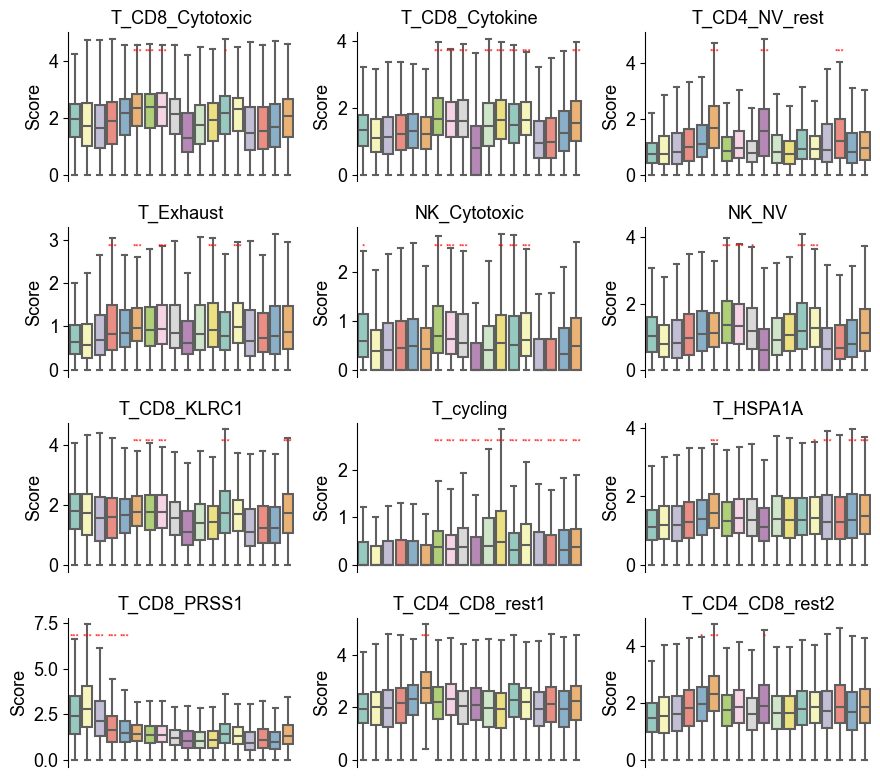

In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import pandas as pd


metadata = adata.obs
# remove the cells which max score - 2nd max score < 0.1
metadata["max_score"] = metadata[adata.obs["cellsubtype"].unique()].max(axis=1)
# metadata['2nd_max_score'] = metadata[adata.uns['celltypes'].tolist()].apply(lambda x: x.nlargest(2).iloc[-1], axis=1)
# metadata['max_score_diff'] = metadata['max_score'] - metadata['2nd_max_score']
metadata_filtered = metadata[metadata["max_score"] > metadata["max_score"].describe()["50%"]]

grouping_column = "region"

# Define the GridSpec layout
gs = gridspec.GridSpec(4, 3)

fig = plt.figure(figsize=(9, 8))

for i, column_to_analyze in enumerate(adata.obs["cellsubtype"].unique()):
    # Initialize a DataFrame to store the data
    data_df = pd.DataFrame(metadata_filtered[[column_to_analyze, grouping_column]])
    scaler = StandardScaler(with_mean=False)
    data_df[column_to_analyze] = scaler.fit_transform(data_df[[column_to_analyze]])
    # softmax transform
    # data_df[column_to_analyze] = np.exp(data_df[column_to_analyze]) / np.exp(data_df[column_to_analyze]).sum()
    t_test_sigs = {}
    t_test_results = {}
    group_labels = data_df[grouping_column].unique().sort_values()
    for group in group_labels:
        group_data = data_df[data_df[grouping_column] == group][column_to_analyze]
        other_groups = [other_group for other_group in group_labels if other_group != group]
        other_group_data = data_df[data_df[grouping_column].isin(other_groups)][column_to_analyze]
        _, p_val = ttest_ind(group_data, other_group_data, alternative="greater")
        if p_val < 0.05:
            if p_val < 0.001:
                stars = "***"
            elif p_val < 0.01:
                stars = "**"
            elif p_val < 0.05:
                stars = "*"
            t_test_sigs[group] = stars
            t_test_results[group] = p_val

    # Create a subplot in the GridSpec layout
    axi = plt.subplot(gs[i // 3, i % 3])
    sns.boxplot(data=data_df, x=grouping_column, y=column_to_analyze, palette="Set3", showfliers=False, ax=axi)
    axi.set_xticklabels(axi.get_xticklabels(), rotation=45, ha="right")
    y_min, y_max = axi.get_ylim()
    for group, stars in t_test_sigs.items():
        x_pos = group_labels.tolist().index(group)
        axi.text(x_pos, y_max * 0.85, s=stars, color="red", ma="center", ha="center", fontsize=6)

    # Remove the x-axis and text
    axi.set_xticks([])
    axi.set_xlabel("")

    # Set the title with a box around it
    axi.set_title(column_to_analyze)
    # Remove the y-axis grid
    axi.grid(False, axis="y")
    # Remove the box around the subplot
    axi.spines["right"].set_visible(False)
    axi.spines["top"].set_visible(False)
    axi.spines["bottom"].set_visible(False)
    # # Set plot labels
    # axi.set_xlabel(grouping_column)
    axi.set_ylabel("Score")

    # Add the title as a row annotation
    # fig.text(0, (i + 0.5) / len(celltypes), column_to_analyze, ha="left", va="center")

# Save the figure
fig.savefig("TNK_subtype_region_boxplot2.pdf")

In [ ]:
# gene set AUC score
from ctxcore.genesig import GeneSignature
CAF_sig = GeneSignature.from_gmt('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/database/signature/immune.gmt')
from pyscenic.aucell import aucell
exp_mtx = pd.DataFrame(adata.X.toarray(),index=adata.obs_names,columns=adata.var_names)
auc_mtx_CAF = aucell(exp_mtx, CAF_sig, noweights=True, num_workers=20)
adata.obs[auc_mtx_CAF.columns] = auc_mtx_CAF.fillna(0)


In [18]:
from ctxcore.genesig import GeneSignature

sig = GeneSignature.from_gmt('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/database/signature/signature.gmt')
T_signature_list = ['CIBERSORT.T.cells.CD8','CIBERSORT.T.cells.CD4.naive','CIBERSORT.T.cells.CD4.memory.resting','CIBERSORT.T.cells.CD4.memory.activated','CIBERSORT.T.cells.follicular.helper','CIBERSORT.T.cells.regulatory..Tregs.','CIBERSORT.T.cells.gamma.delta','Bernard_Cytotoxic.T','Chen_ExhaustT','Chen_NaiveT','Chen_EffectorT','Chen_RegT','NKCytotoxic','T_CD4_NV_CM_rest','T_CD4_CD8_rest','T_IFN_Response','T_Proliferation','T_CD8_Cytotoxic','T_CD8_Cytokine']
sig_T = []
for i in sig:
    if i.name in T_signature_list:
        sig_T.append(i)
from pyscenic.aucell import aucell
exp_mtx = pd.DataFrame(adata.X.toarray(),index=adata.obs_names,columns=adata.var_names)
auc_mtx = aucell(exp_mtx, sig_T, noweights=True, num_workers=20)
all_zero_columns = auc_mtx.columns[auc_mtx.eq(0).all()]
auc_mtx_filtered = auc_mtx.drop(columns=all_zero_columns, inplace=False)
adata.obs[auc_mtx_filtered.columns] = auc_mtx_filtered.fillna(0)


Less than 80% of the genes in CIBERSORT.T.cells.CD4.memory.resting are present in the expression matrix.
Less than 80% of the genes in CIBERSORT.T.cells.CD4.memory.activated are present in the expression matrix.
Less than 80% of the genes in CIBERSORT.T.cells.regulatory..Tregs. are present in the expression matrix.
Less than 80% of the genes in NKCytotoxic are present in the expression matrix.


In [20]:
auc_mtx_filtered.shape

(210945, 15)

meta NOT subset; don't know how to subset; dropped


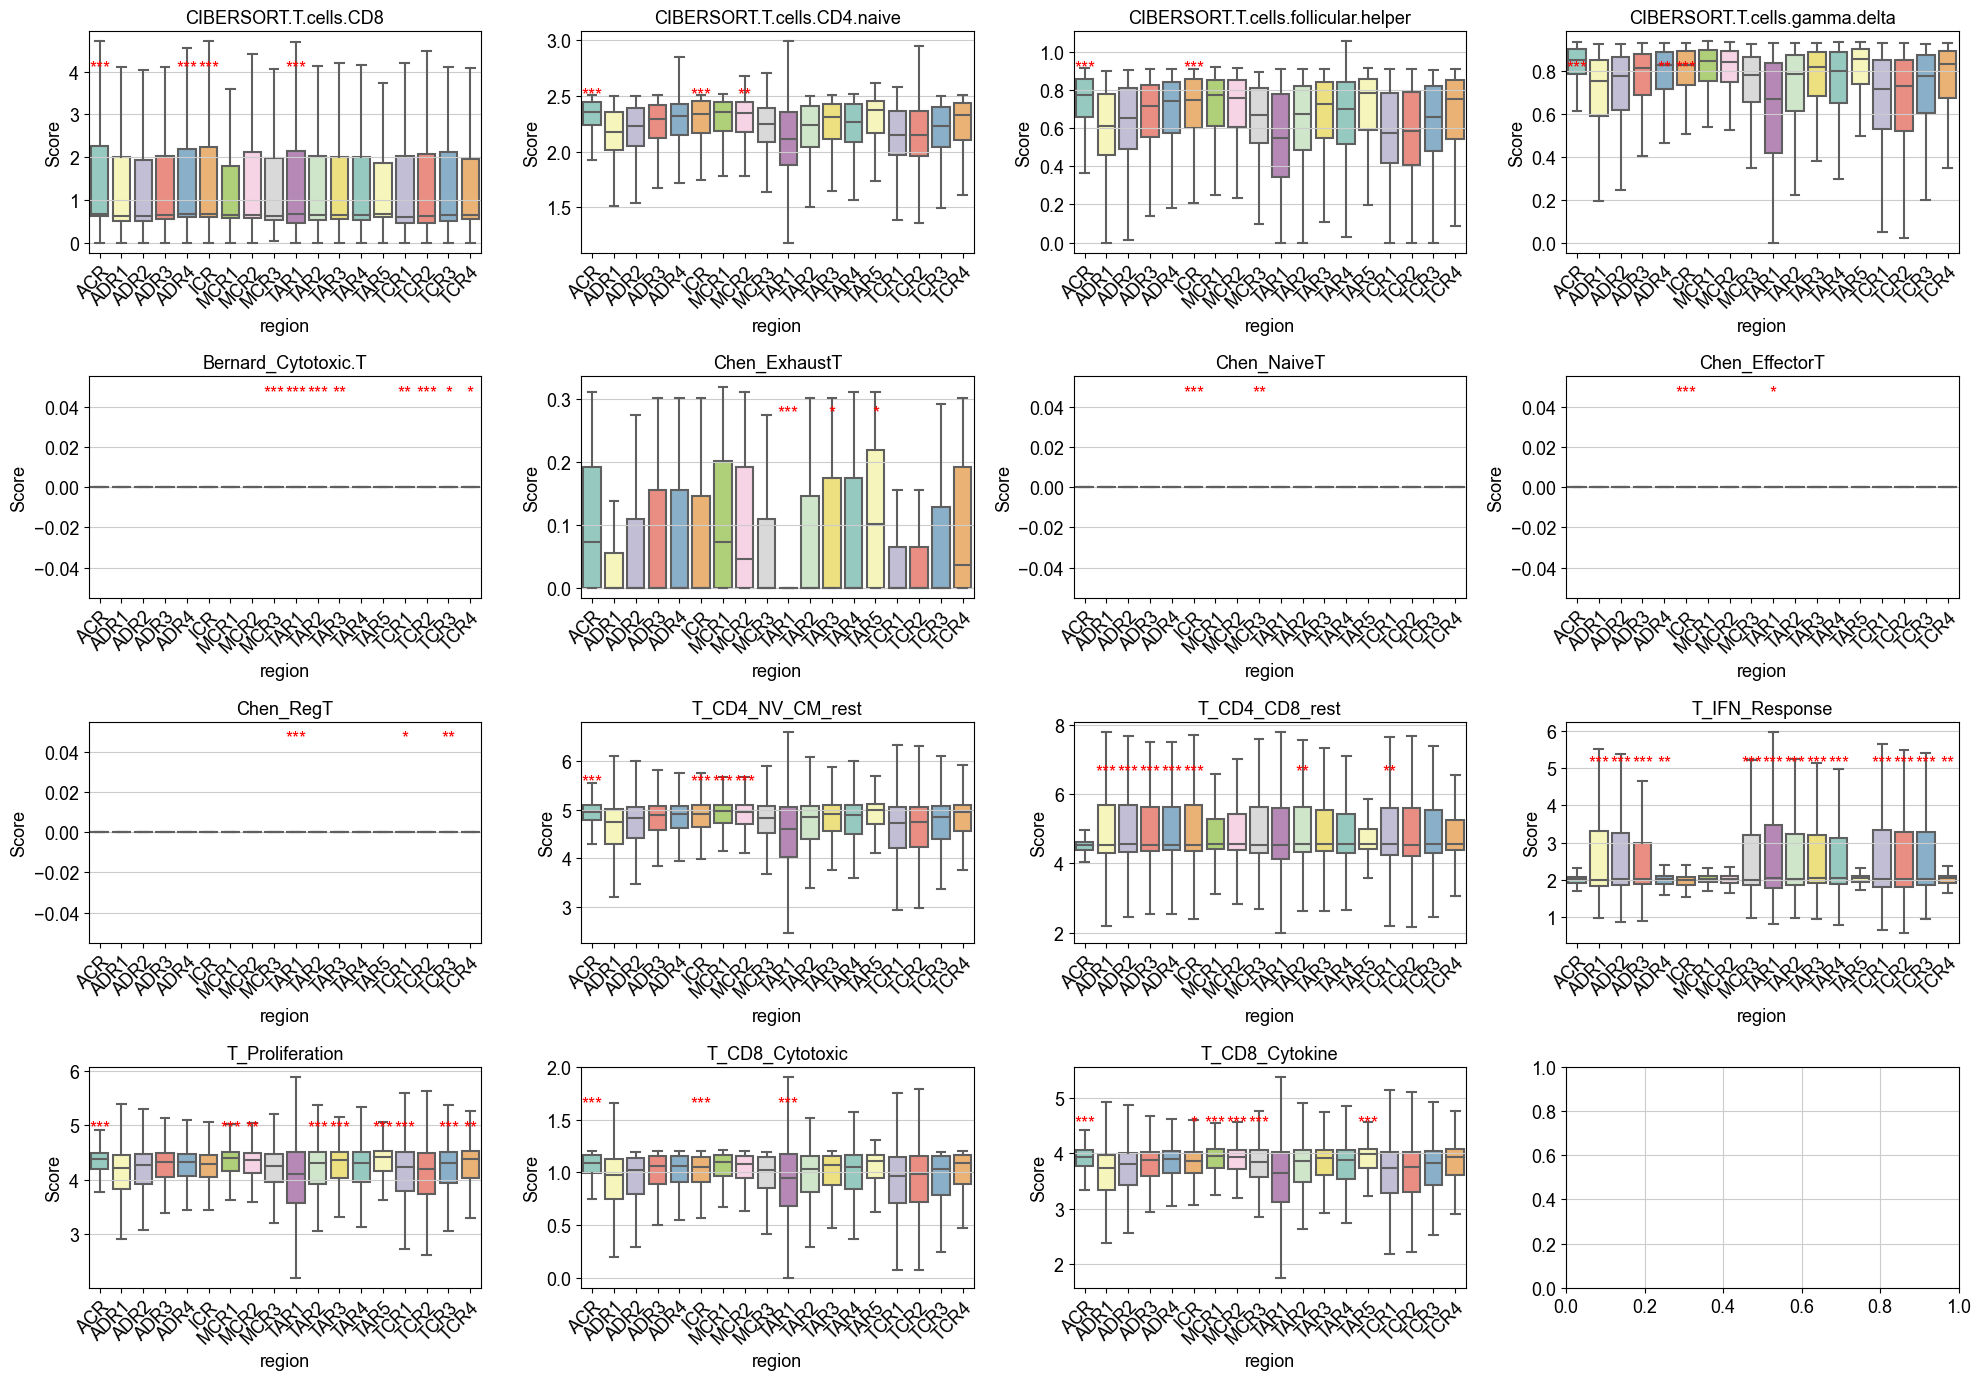

In [23]:
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont
Image.MAX_IMAGE_PIXELS = None
metadata = adata.obs
metadata['max_score'] = metadata[adata.obs['cellsubtype'].unique()].max(axis=1)
# metadata['2nd_max_score'] = metadata[adata.uns['celltypes'].tolist()].apply(lambda x: x.nlargest(2).iloc[-1], axis=1)
# metadata['max_score_diff'] = metadata['max_score'] - metadata['2nd_max_score']
metadata_filtered = metadata[metadata['max_score'] > metadata['max_score'].describe()['50%']]
# remove the cells which max score - 2nd max score < 0.1
grouping_column = "region"
fig, axs = plt.subplots(4, 4, figsize=(20, 14))
for i, column_to_analyze in enumerate(auc_mtx_filtered.columns):
    # Initialize a DataFrame to store the data
    data_df = pd.DataFrame(metadata[[column_to_analyze, grouping_column]])
    scaler = StandardScaler(with_mean=False)
    data_df[column_to_analyze] = scaler.fit_transform(data_df[[column_to_analyze]])
    t_test_sigs = {}
    t_test_results = {}
    group_labels = data_df[grouping_column].unique().sort_values()
    for group in group_labels:
        group_data = data_df[data_df[grouping_column] == group][column_to_analyze]
        other_groups = [other_group for other_group in group_labels if other_group != group]
        other_group_data = data_df[data_df[grouping_column].isin(other_groups)][column_to_analyze]
        _, p_val = ttest_ind(group_data, other_group_data, alternative="greater")
        if p_val < 0.05:
            if p_val < 0.001:
                stars = "***"
            elif p_val < 0.01:
                stars = "**"
            elif p_val < 0.05:
                stars = "*"            
            t_test_sigs[group] = stars
            t_test_results[group] = p_val
    axi = axs[i//4,i%4]
    sns.boxplot(data=data_df, x=grouping_column, y=column_to_analyze, palette="Set3",showfliers=False,ax=axi)
    axi.set_xticklabels(group_labels,rotation=45, ha="right", rotation_mode='anchor')
    y_min, y_max = axi.get_ylim()
    for group, stars in t_test_sigs.items():
        x_pos = group_labels.tolist().index(group)
        axi.text(x_pos, y_max * 0.8, s=stars, color='red',ma='center',ha='center')
    # Set plot labels
    axi.set_xlabel(grouping_column)
    axi.set_ylabel('Score')
    axi.set_title(column_to_analyze)
fig.savefig(f"Immune_signature_region_boxplot.pdf")

In [24]:
adata = sc.read('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/2.1_merge_big_cell_community/all_merged_adata.h5ad')
region_map = {
    "Tumor_Cell_region_1": 'TCR1',
    'Tumor_Cell_region_2': 'TCR2',
    'Tumor_Cell_region_3': 'TCR3',
    'Tumor_Cell_region_4': 'TCR4',
    'Tumor_around_region_1': 'TAR1',
    'Tumor_around_region_2': 'TAR2',
    'Tumor_around_region_3': 'TAR3',
    'Tumor_around_region_4': 'TAR4',
    'Tumor_around_region_5': 'TAR5',
    'Mesenchymal_Cell_region_1': 'MCR1',
    'Mesenchymal_Cell_region_2': 'MCR2',
    'Mesenchymal_Cell_region_3': 'MCR3',
    'ADM_region_1': 'ADR1',
    'ADM_region_2': 'ADR2',
    'ADM_region_3': 'ADR3',
    'ADM_region_4': 'ADR4',
    'Acinar_Cell_region':'ACR',
    'Immune_Cell_region':'ICR',
}
adata.obs['region'] = adata.obs['community_type'].map(region_map)
adata.obs['region'] = pd.Categorical(adata.obs['region'], categories=sorted(adata.obs['region'].unique()))
adata = adata[adata.obs['celltype'] == 'T/NK_Cell']




In [30]:
ICPs = ['LAG3', 'CTLA4', 'ICOS', 'TIGIT', 'ICOSLG', 'CD274', 'HAVCR2']

# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
sc.pl.stacked_violin(adata, ICPs, groupby='region', standard_scale='var', save=f'ICPs_region.pdf', cmap='viridis_r',show=False, use_raw=False, swap_axes=True)


/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
meta NOT subset; don't know how to subset; dropped


{'mainplot_ax': <AxesSubplot: >,
 'color_legend_ax': <AxesSubplot: title={'center': 'Median expression\nin group'}>}

In [31]:
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
sc.pl.stacked_violin(adata, ['CXCL12','CXCR4','SERPINE1','ITGA2','TGFB1','BHLHE40'], groupby='region', standard_scale='var', save=f'cxcl12_region.pdf', cmap='viridis_r',show=False, use_raw=False, swap_axes=True)

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
meta NOT subset; don't know how to subset; dropped


{'mainplot_ax': <AxesSubplot: >,
 'color_legend_ax': <AxesSubplot: title={'center': 'Median expression\nin group'}>}

In [18]:
adata

AnnData object with n_obs × n_vars = 88639 × 20127
    obs: 'cluster_cell_counts', 'merged_cluster', 'celltype', 'cellsubtype', 'community_type', 'batch', 'x', 'y', 'sample', 'region'
    uns: 'log1p'
    obsm: 'spatial'